In [1]:
import pandas as pd
import numpy as np

In [2]:
import time

starting_time = time.time()
data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\Final Major Project\\Machine Learning Algorithm\\Datasets\\RAVTESS_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.061747074127197266ms
   Unnamed: 0           0          1          2          3          4  \
0        4882 -366.748291  46.785877 -32.808887  -2.023243 -18.644951   
1        3975 -345.137543  31.164049 -16.423462  31.539543 -24.091246   
2        2763 -464.435730  86.838699  20.752911  19.927128  15.061339   
3        2003 -619.466003  62.775608   0.588664  22.818275   8.705647   
4        4467 -308.117981  38.490005 -16.501511  20.986532 -17.435190   

           5          6          7          8  ...         31        32  \
0  -1.328158 -26.783998 -11.554439 -16.565105  ...   8.238031  2.859965   
1  -1.723528  -6.422258 -13.986626 -10.756482  ...  12.536610  2.141153   
2   6.977795 -15.664279   8.531913 -21.940149  ...  -0.216900  3.597229   
3  10.100799   4.076850  -2.424498  -6.344779  ...   1.269319  0.962817   
4   4.257079  -9.640630 -11.041712  -5.308348  ...   8.131878  2.128637   

         33        34         35         36         37         38       

In [3]:
data.shape

(5252, 42)

In [4]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [5]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [6]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [7]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

## SVM

Implementing SVM with Scikit-Learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X.shape, y.shape

((5252, 40), (5252,))

In [10]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [12]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [13]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 65.85076689720154 ms 


To make predictions, the predict method of the SVC class is used.

In [14]:
y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:

Classification Report:
---------------------
              precision    recall  f1-score   support

       angry       0.18      0.23      0.20       147
        calm       0.08      0.09      0.08        77
     disgust       0.14      0.14      0.14       123
        fear       0.15      0.16      0.15       143
       happy       0.19      0.17      0.18       165
     neutral       0.14      0.14      0.14       114
         sad       0.22      0.19      0.20       148
   surprised       0.13      0.10      0.12       134

    accuracy                           0.16      1051
   macro avg       0.15      0.15      0.15      1051
weighted avg       0.16      0.16      0.16      1051



SVM Model Evaluation
--------------------
Accuracy: 15.89%




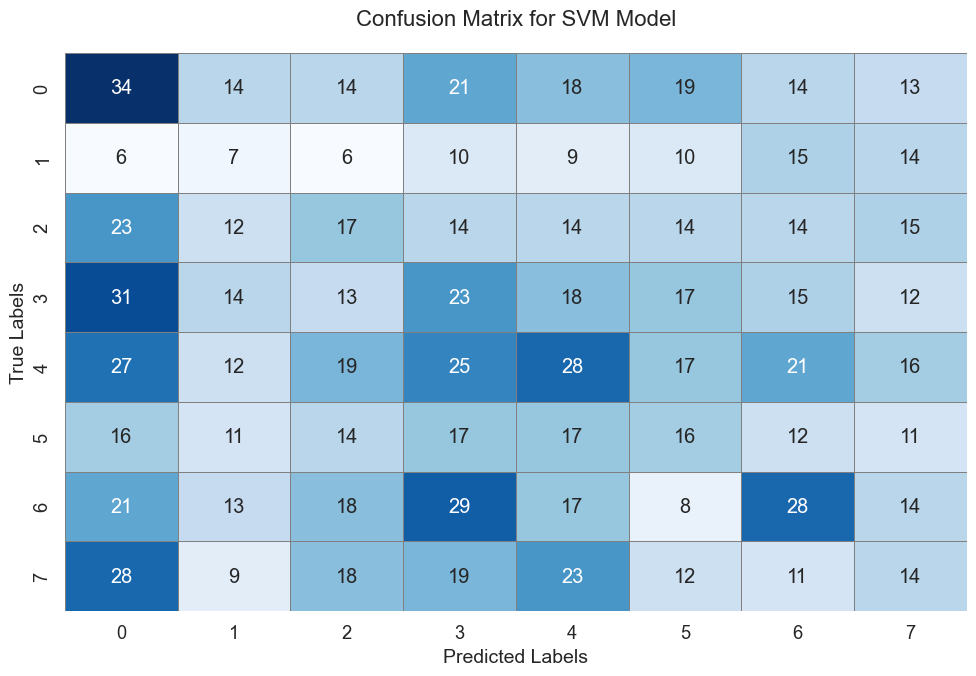

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("Classification Report:")
print("---------------------")
print(classification_report(y_test, y_pred))
print("\n")

acc = float(accuracy_score(y_test, y_pred)) * 100
print("SVM Model Evaluation")
print("--------------------")
print(f"Accuracy: {acc:.2f}%")
print("\n")

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)


sns.set(font_scale=1.2)  
ax = sns.heatmap(df_cm, 
                 annot=True, 
                 fmt='d',  
                 cmap='Blues', 
                 cbar=False,  
                 linewidths=0.5, 
                 linecolor='gray')  
plt.title('Confusion Matrix for SVM Model', fontsize=16, pad=20)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)


plt.tight_layout()  
plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [16]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 77.31492501785289 ----
----test accuracy score 74.02473834443387 ----


## Cross-Validation

5-fold cross validation of the dataset with the SVC classifier.

In [17]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.69933397 0.72026641 0.7247619  0.71809524 0.76666667]


## Scaling 

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.8468125594671742
Accuracy without Scaling: 0.7392959086584205


### Generalization check
Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [19]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 86.88407522018568 ----
----test accuracy score 84.68125594671741 ----


In [20]:
scaled_predictions = svc_scaled.predict(X_test)

### Classification reports and Confusion Matrix

SVM Model Performance Metrics:
              precision    recall  f1-score   support

       angry       0.89      0.90      0.89       147
        calm       0.58      0.87      0.70        77
     disgust       0.84      0.84      0.84       123
        fear       0.87      0.80      0.83       143
       happy       0.93      0.77      0.84       165
     neutral       0.99      0.89      0.94       114
         sad       0.82      0.85      0.83       148
   surprised       0.84      0.90      0.87       134

    accuracy                           0.85      1051
   macro avg       0.85      0.85      0.84      1051
weighted avg       0.86      0.85      0.85      1051



Model Accuracy: 84.68%




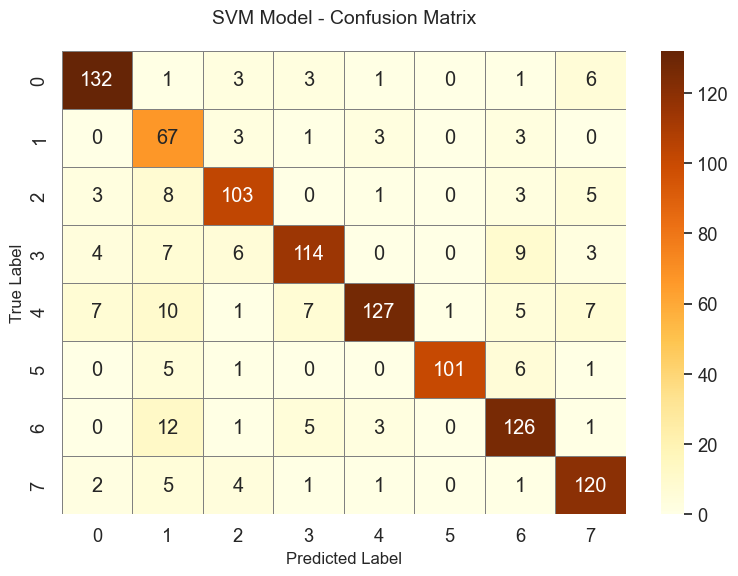

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Print classification report
print("SVM Model Performance Metrics:")
print("="*50)
print(classification_report(y_test, scaled_predictions))
print("\n")

# Calculate and display accuracy
acc = float(accuracy_score(y_test, scaled_predictions)) * 100
print(f"Model Accuracy: {acc:.2f}%")
print("="*50)
print("\n")

# Create and display confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, scaled_predictions)
df_cm = pd.DataFrame(cm)

# Create heatmap with title
heatmap = sns.heatmap(df_cm, 
                      annot=True, 
                      fmt='d',  # Display integers
                      cmap='YlOrBr',  # Color scheme
                      cbar=True,
                      linewidths=0.5,
                      linecolor='grey')

# Add title and labels
heatmap.set_title('SVM Model - Confusion Matrix', 
                 fontsize=14, 
                 pad=20)  # pad adds space above title
heatmap.set_xlabel('Predicted Label', fontsize=12)
heatmap.set_ylabel('True Label', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.83063749 0.81826832 0.84380952 0.83619048 0.8552381 ]
